In this notebook, we are going through Starbucks data available here: https://www.kaggle.com/datasets/ihormuliar/starbucks-customer-data

There are three datasets:
1. Profile: contains customers data
2. Transcript: records show the different steps of promotional offers that a customer received and transactions made
3. Portfolio: information about promotion offers

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
profile = pd.read_csv('profile.csv')
portfolio = pd.read_csv('portfolio.csv')
transcript = pd.read_csv('transcript.csv')

In [3]:
profile

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0


In [4]:
portfolio

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [5]:
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


First, we are going to explore profile dataset.

In [6]:
profile.isna().sum()

Unnamed: 0             0
gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [7]:
profile[profile.isna().any(axis=1)]

,Unnamed: 0,gender,age,id,became_member_on,income
0,0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...,...
16980,16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


It turns out that the empty income data and the empty gender data are on the same rows. The age is suspicious too since all of them are 118. Since we are going to cluster the customers based on the profile, we are going to drop all the rows with empty cells.

In [8]:
profile.dropna(inplace=True)
profile.isna().sum()

Unnamed: 0          0
gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

Let's explore a little bit.

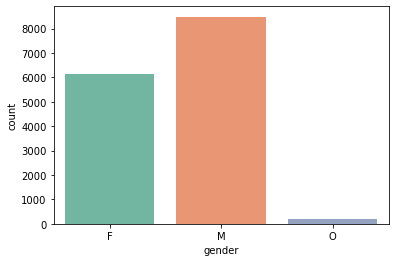

In [9]:
sns.countplot(x='gender', data=profile, palette='Set2')
plt.show()

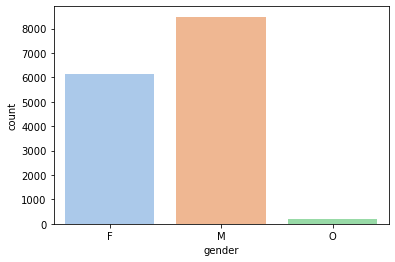

In [10]:
sns.countplot(x='gender', data=profile, palette='pastel')
plt.show()

<AxesSubplot:xlabel='age', ylabel='income'>

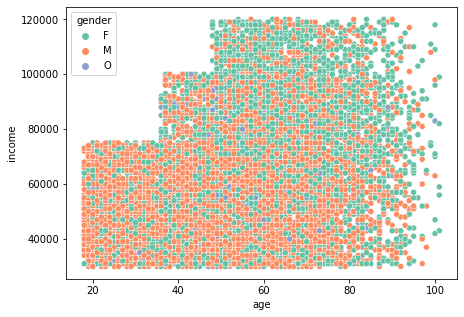

In [11]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='income', hue='gender', data=profile, palette='Set2', alpha=1)

<AxesSubplot:xlabel='age', ylabel='income'>

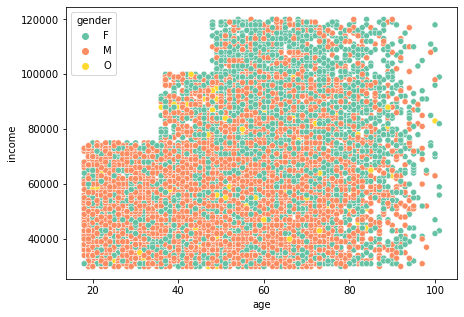

In [12]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='age', y='income', hue='gender', data=profile, palette=['#66c2a5','#fc8d62','#ffd92f'])

Most customers are male. There is a small number of O (other), gender that is not listed in the other two group.
Customer's age and income seems to be related (possitive corelation). 

We are going to make a new dataset contain information for clustering.

In [13]:
X = profile[profile.columns.difference(['id', 'Unnamed: 0'])].copy()
X.head()

,age,became_member_on,gender,income
1,55,20170715,F,112000.0
3,75,20170509,F,100000.0
5,68,20180426,M,70000.0
8,65,20180209,M,53000.0
12,58,20171111,M,51000.0


In [14]:
X['gender'] = pd.factorize(X.gender)[0]
X['became_member_on'] = X['became_member_on'].astype(str).str[:4].astype(int)
X.head()

,age,became_member_on,gender,income
1,55,2017,0,112000.0
3,75,2017,0,100000.0
5,68,2018,1,70000.0
8,65,2018,1,53000.0
12,58,2017,1,51000.0


In [15]:
X.describe()

,age,became_member_on,gender,income
count,14825.000000,14825.000000,14825.000000,14825.000000
mean,54.393524,2016.620169,0.600877,65404.991568
std,17.383705,1.198245,0.518114,21598.299410
min,18.000000,2013.000000,0.000000,30000.000000
25%,42.000000,2016.000000,0.000000,49000.000000
50%,55.000000,2017.000000,1.000000,64000.000000
75%,66.000000,2017.000000,1.000000,80000.000000
max,101.000000,2018.000000,2.000000,120000.000000


In [16]:
X.gender.value_counts()

1    8484
0    6129
2     212
Name: gender, dtype: int64

Male, Female, and Others translated as 1, 0, and 2, respectively.

In [17]:
from sklearn.preprocessing import StandardScaler

df_std = StandardScaler().fit_transform(X[['age', 'gender', 'income']])

We make a new dataframe with standardized value. Since year of becoming member does not really important for profiling and does not represent anything, we decided to not use the column for clustering.

Then, we are going to decide number of cluster using elbow method and silhouette score.

In [18]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df_std)
    kmeanModel.fit(df_std)
  
    distortions.append(sum(np.min(cdist(df_std, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df_std.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df_std, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df_std.shape[0]
    mapping2[k] = kmeanModel.inertia_

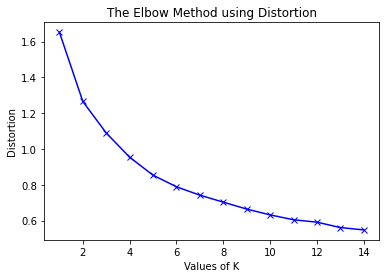

In [19]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

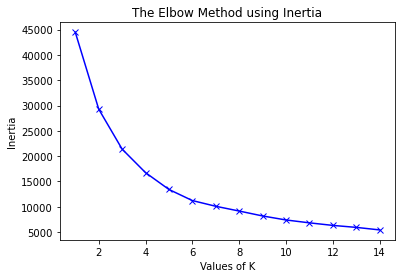

In [20]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [21]:

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
  
# Generating the sample data from make_blobs
  
  
for n_clusters in range(2,15):
  
    cluster = KMeans(n_clusters = n_clusters)
    cluster_labels = cluster.fit_predict(df_std)
  
    # The silhouette_score gives the 
    # average value for all the samples.
    silhouette_avg = silhouette_score(df_std, cluster_labels)
  
    print("For no of clusters =", n_clusters,
          " The average silhouette_score is :", silhouette_avg)

For no of clusters = 2  The average silhouette_score is : 0.3663484665813544
For no of clusters = 3  The average silhouette_score is : 0.3411541150874492
For no of clusters = 4  The average silhouette_score is : 0.3532326492352407
For no of clusters = 5  The average silhouette_score is : 0.36790611067019546
For no of clusters = 6  The average silhouette_score is : 0.37000187349825236
For no of clusters = 7  The average silhouette_score is : 0.34821758392590846
For no of clusters = 8  The average silhouette_score is : 0.3378958263488443
For no of clusters = 9  The average silhouette_score is : 0.33752864941867927
For no of clusters = 10  The average silhouette_score is : 0.34689822419691
For no of clusters = 11  The average silhouette_score is : 0.33964200343951867
For no of clusters = 12  The average silhouette_score is : 0.3436947301386801
For no of clusters = 13  The average silhouette_score is : 0.3413419889322048
For no of clusters = 14  The average silhouette_score is : 0.34016388

Based on the results above, we are going to divide the customers into six clusters.

In [22]:
cluster_model = KMeans(n_clusters=6)
cluster_model.fit(df_std)
cluster_label = cluster_model.labels_

In [23]:
X['Unnamed: 0'] = 0
X['cluster'] = cluster_label

In [24]:
X.groupby('Unnamed: 0')[['age','became_member_on','gender','income']].agg(['min','max','mean', pd.Series.mode])

age                      became_member_on                           \
           min  max       mean mode              min   max         mean  mode   
Unnamed: 0                                                                      
0           18  101  54.393524   58             2013  2018  2016.620169  2017   

           gender                      income                                   
              min max      mean mode      min       max          mean     mode  
Unnamed: 0                                                                      
0               0   2  0.600877    1  30000.0  120000.0  65404.991568  73000.0

In [25]:
X.groupby('cluster')[['age','became_member_on','gender','income']].agg(['min','max','mean',pd.Series.mode])

age                      became_member_on                           \
        min  max       mean mode              min   max         mean  mode   
cluster                                                                      
0        18   49  33.989073   42             2013  2018  2016.655011  2017   
1        36  101  62.704049   53             2013  2018  2016.595142  2017   
2        49  100  64.738070   54             2013  2018  2016.629551  2017   
3        54  101  69.978441   58             2013  2018  2016.648977  2017   
4        36  100  60.690691   52             2013  2018  2016.536411  2017   
5        18   56  38.498919   48             2013  2018  2016.671351  2017   

        gender                      income                                   
           min max      mean mode      min       max          mean     mode  
cluster                                                                      
0            1   2  1.017796    1  30000.0   77000.0  51291.601623  53000.0  
1            0   0  0.000000    0  72000.0  120000.0  93435.627530  87000.0  
2            1   2  1.025451    1  30000.0   73000.0  50020.501944  52000.0  
3            0   0  0.000000    0  30000.0   85000.0  58275.290216  71000.0  
4            1   2  1.031156    1  66000.0  120000.0  85134.009009  73000.0  
5            0   0  0.000000    0  30000.0   85000.0  54503.243243  54000.0

Based on the stats above, the clusters are as follows:
*0: Younger M/O
*1: Older F with higher income
*2: Older M/O with middle income
*3: Older F with middle income
*4: Older M/O with higher income
*5: Younger F

In [26]:
cluster_dict = {
    0: 'Young-M/O-Mid Income',
    1: 'Old-F-High Income',
    2: 'Old-M/O-Mid Income',
    3: 'Old-F-Mid Income',
    4: 'Old-M/O-High Income',
    5: 'Young-F-Mid Income',
}
label = np.array([cluster_dict[x] for x in cluster_label])
label

array(['Old-F-High Income', 'Old-F-High Income', 'Old-M/O-High Income',
       ..., 'Old-M/O-High Income', 'Old-F-Mid Income',
       'Old-F-High Income'], dtype='<U20')

In [27]:
X['cluster'] = label

In [28]:
profile['cluster']=label
profile

,Unnamed: 0,gender,age,id,became_member_on,income,cluster
1,1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,Old-F-High Income
3,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
5,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Old-M/O-High Income
8,8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Old-M/O-Mid Income
12,12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Old-M/O-Mid Income
...,...,...,...,...,...,...,...
16995,16995,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,Young-F-Mid Income
16996,16996,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,Old-M/O-High Income
16997,16997,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,Old-M/O-High Income
16998,16998,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,Old-F-Mid Income


In [29]:
profile.cluster.value_counts()

Young-M/O-Mid Income    3203
Old-M/O-Mid Income      2829
Old-M/O-High Income     2664
Old-F-High Income       2470
Young-F-Mid Income      1850
Old-F-Mid Income        1809
Name: cluster, dtype: int64

<AxesSubplot:xlabel='count', ylabel='cluster'>

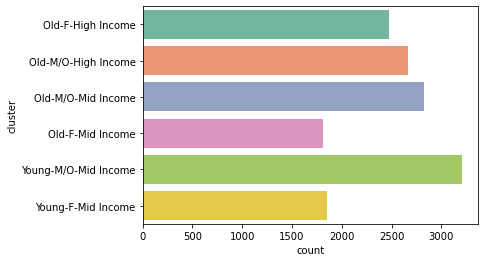

In [30]:
sns.countplot(y='cluster',data=profile,palette='Set2')

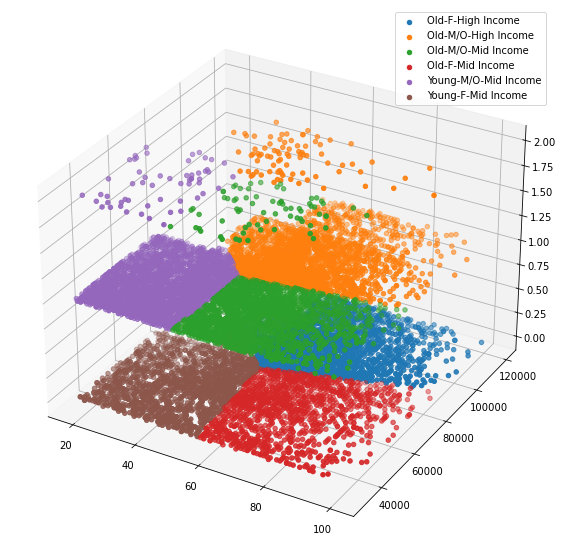

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for s in X.cluster.unique():
    ax.scatter(X.age[X.cluster==s],X.income[X.cluster==s],X.gender[X.cluster==s], label=s, cmap=plt.cm.Set2)
    
ax.legend()

Now we have clusters of customers, we can use this to map the behaviour of this cluster regarding promotion offers and transactions.

In [32]:
transcript

,Unnamed: 0,person,event,value,time
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...
306529,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [33]:
promo = transcript.merge(profile, left_on='person', right_on='id', how='inner')

In [34]:
promo

,Unnamed: 0_x,person,event,value,time,Unnamed: 0_y,gender,age,id,became_member_on,income,cluster
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
1,15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
2,47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
3,47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
4,49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
...,...,...,...,...,...,...,...,...,...,...,...,...
272757,218175,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},504,16139,M,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,Old-M/O-High Income
272758,257182,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,16139,M,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,Old-M/O-High Income
272759,261927,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,16139,M,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,Old-M/O-High Income
272760,253904,3045af4e98794a04a5542d3eac939b1f,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,11903,F,58,3045af4e98794a04a5542d3eac939b1f,20161020,78000.0,Old-F-High Income


In [35]:
promo.isna().sum()

Unnamed: 0_x        0
person              0
event               0
value               0
time                0
Unnamed: 0_y        0
gender              0
age                 0
id                  0
became_member_on    0
income              0
cluster             0
dtype: int64

In [36]:
transcript.event.value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

<AxesSubplot:xlabel='event', ylabel='count'>

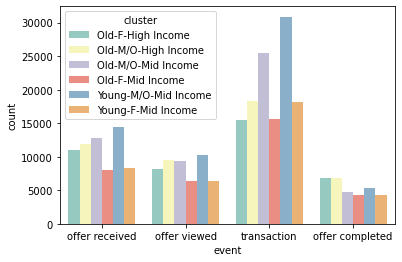

In [37]:
sns.countplot(x='event', hue='cluster', data=promo, palette='Set3')

In [38]:
trans = promo[promo['event']=='transaction'].copy()
trans['amount'] = trans['value'].str[11:-1].astype(float)

In [39]:
spending = trans.groupby('cluster')['amount'].sum().reset_index()

In [40]:
promo.pivot_table(index='cluster',columns='event',values='time',aggfunc=['min','max','mean'])

min                                          \
event                offer completed offer received offer viewed transaction   
cluster                                                                        
Old-F-High Income                  0              0            0           0   
Old-F-Mid Income                   0              0            0           0   
Old-M/O-High Income                0              0            0           0   
Old-M/O-Mid Income                 0              0            0           0   
Young-F-Mid Income                 0              0            0           0   
Young-M/O-Mid Income               0              0            0           0   

                                 max                                          \
event                offer completed offer received offer viewed transaction   
cluster                                                                        
Old-F-High Income                714            576          714         714   
Old-F-Mid Income                 714            576          714         714   
Old-M/O-High Income              714            576          714         714   
Old-M/O-Mid Income               714            576          714         714   
Young-F-Mid Income               714            576          714         714   
Young-M/O-Mid Income             714            576          714         714   

                                mean                                          
event                offer completed offer received offer viewed transaction  
cluster                                                                       
Old-F-High Income         396.582892     332.468475   355.160673  381.740536  
Old-F-Mid Income          400.108470     334.348202   358.061144  382.828362  
Old-M/O-High Income       397.603831     332.416381   353.249841  382.487125  
Old-M/O-Mid Income        403.108886     332.093637   354.217244  380.419884  
Young-F-Mid Income        394.191705     331.280576   351.623143  378.414839  
Young-M/O-Mid Income      407.028777     333.133157   355.202938  381.937105

<AxesSubplot:xlabel='amount', ylabel='cluster'>

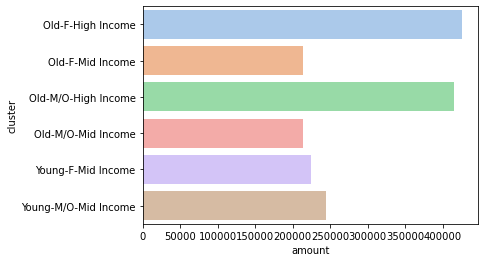

In [41]:
sns.barplot(y=spending.cluster, x=spending.amount, palette='pastel')

<AxesSubplot:xlabel='amount', ylabel='cluster'>

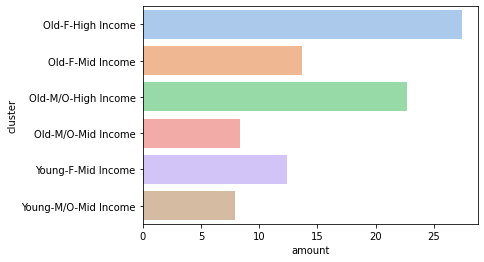

In [42]:
spendingavg = trans.groupby('cluster')['amount'].mean().reset_index()
sns.barplot(y=spendingavg.cluster, x=spendingavg.amount, palette='pastel')

From the data above, we can say:
1. Promotions most likely taken by male and others instead of female customers. Especially M/O customers with mid income which has the most number. Yet, the number of M/O customers with mid income who completed the offers in the end is relatively low despite the high number of customers received the offers at first.

2. Most transactions done by Young M/O customers, followed by Old M/O with Mid Income, but spending averages for both are low.

3. Highest spending avg is Old F High Income and then Old M/O High Income. Both groups are also the two groups with highest spending total.

4. There is no significant time difference between clusters for each event.

Now we already know the behaviour, we are going to check how effective the promotion offers for each groups.

In [43]:
promo.head()

,Unnamed: 0_x,person,event,value,time,Unnamed: 0_y,gender,age,id,became_member_on,income,cluster
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
1,15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
2,47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
3,47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income
4,49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income


In [44]:
portfolio
portfolio.rename(columns={"Unnamed: 0": "Promotion Type"}, inplace=True)

In [45]:
portfolio.id.str.len()

0    32
1    32
2    32
3    32
4    32
5    32
6    32
7    32
8    32
9    32
Name: id, dtype: int64

All id is 32 characters

In [46]:
promo['offer_id']=np.where(promo['event']=='transaction',0,promo['value'].str[14:46])

In [47]:
promo.head()

,Unnamed: 0_x,person,event,value,time,Unnamed: 0_y,gender,age,id,became_member_on,income,cluster,offer_id
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,47582,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 19.89},132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,0
3,47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,49502,78afa995795e4d85b5d9ceeca43f5fef,transaction,{'amount': 17.78},144,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,0


In [48]:
promo2 = promo.merge(portfolio, left_on='offer_id', right_on='id', how='inner')
promo2

,Unnamed: 0_x,person,event,value,time,Unnamed: 0_y,gender,age,id_x,became_member_on,income,cluster,offer_id,Promotion Type,reward,channels,difficulty,duration,offer_type,id_y
0,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,15561,78afa995795e4d85b5d9ceeca43f5fef,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},6,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
2,47583,78afa995795e4d85b5d9ceeca43f5fef,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,132,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Old-F-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
3,150600,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Old-M/O-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,171209,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},420,5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Old-M/O-High Income,9b98b8c7a33c4b65b9aebfe6a799e6d9,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148800,217850,8578196a074a4f328976e334fa9383a3,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},504,14695,M,48,8578196a074a4f328976e334fa9383a3,20180610,58000.0,Young-M/O-Mid Income,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
148801,257182,9fcbff4f8d7241faa4ab8a9d19c8a812,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,16139,M,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,Old-M/O-High Income,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
148802,261927,9fcbff4f8d7241faa4ab8a9d19c8a812,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,16139,M,47,9fcbff4f8d7241faa4ab8a9d19c8a812,20171013,94000.0,Old-M/O-High Income,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
148803,253904,3045af4e98794a04a5542d3eac939b1f,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},576,11903,F,58,3045af4e98794a04a5542d3eac939b1f,20161020,78000.0,Old-F-High Income,4d5c57ea9a6940dd891ad53e9dbe8da0,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0


In [49]:
promo2.pivot_table(index='cluster',columns=['event','offer_type'],values='Unnamed: 0_x',aggfunc='count')

event                offer completed          offer received           \
offer_type                      bogo discount           bogo discount   
cluster                                                                 
Old-F-High Income               3314     3490           4411     4395   
Old-F-Mid Income                2091     2242           3241     3243   
Old-M/O-High Income             3314     3577           4826     4804   
Old-M/O-Mid Income              2148     2646           5029     5083   
Young-F-Mid Income              2096     2244           3323     3305   
Young-M/O-Mid Income            2295     2987           5707     5834   

event                              offer viewed                         
offer_type           informational         bogo discount informational  
cluster                                                                 
Old-F-High Income             2217         3561     3116          1470  
Old-F-Mid Income              1609         2761     2360          1192  
Old-M/O-High Income           2311         4070     3667          1709  
Old-M/O-Mid Income            2618         4165     3417          1836  
Young-F-Mid Income            1712         2821     2257          1248  
Young-M/O-Mid Income          2833         4661     3644          1905

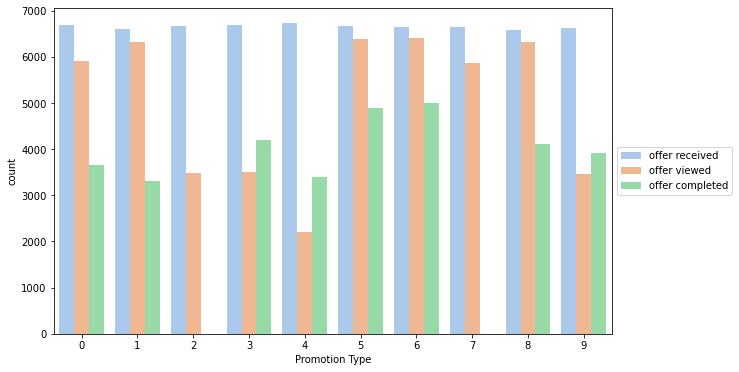

In [50]:
plt.figure(figsize=(10,6))
ax=sns.countplot(hue='event', x='Promotion Type', data=promo2, palette='pastel')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

We can see that all type of promotion almost have the same number of offer received. Promotion type 6 and 5 is more successful than the others.

For offer_type discount and bogo, customers tend to take promo with lower difficulty first.

Promotion with channels 'social' tend to have higher offer viewed.

In [51]:
portfolio

,Promotion Type,reward,channels,difficulty,duration,offer_type,id
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [52]:
promo2.pivot_table(index='cluster', columns='Promotion Type', values='event', aggfunc='count')

Promotion Type,0,1,2,3,4,5,6,7,8,9
cluster,,,,,,,,,,
Old-F-High Income,2803,2947,1654,2530,2368,3006,3113,2033,3006,2514
Old-F-Mid Income,2071,2114,1294,1883,1594,2195,2279,1507,2025,1777
Old-M/O-High Income,3121,3100,1947,2820,2583,3296,3357,2073,3169,2812
Old-M/O-Mid Income,2828,2815,1902,2540,2031,3324,3330,2552,3159,2461
Young-F-Mid Income,2097,2045,1316,1897,1524,2337,2128,1644,2201,1817
Young-M/O-Mid Income,3321,3211,2031,2702,2227,3762,3855,2707,3429,2621


In [53]:
offer_v = promo2[promo2['event']=='offer viewed'].pivot_table(index='cluster', columns='Promotion Type', values='event', aggfunc='count')
offer_r = promo2[promo2['event']=='offer received'].pivot_table(index='cluster', columns='Promotion Type', values='event', aggfunc='count')
offer_c = promo2[promo2['event']=='offer completed'].pivot_table(index='cluster', columns='Promotion Type', values='event', aggfunc='count')

<AxesSubplot:title={'center':'Rate of promotion offer received will be viewed'}, xlabel='Promotion Type', ylabel='cluster'>

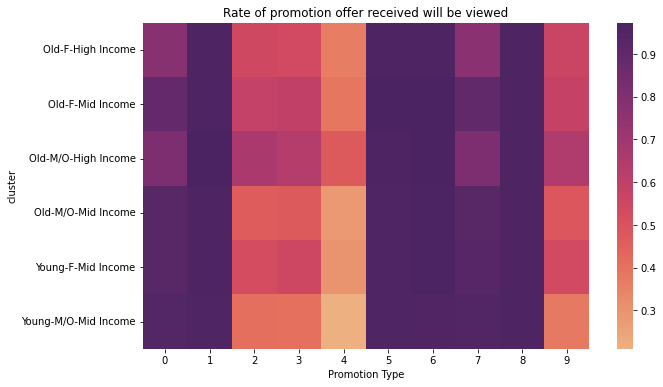

In [54]:
plt.figure(figsize=(10,6))
plt.title('Rate of promotion offer received will be viewed')
sns.heatmap(offer_v.divide(offer_r),cmap='flare')

<AxesSubplot:title={'center':'Rate of promotion offer received will be completed'}, xlabel='Promotion Type', ylabel='cluster'>

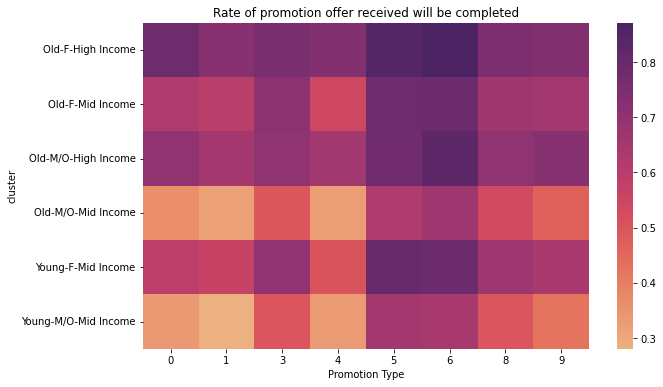

In [55]:
plt.figure(figsize=(10,6))
plt.title('Rate of promotion offer received will be completed')
sns.heatmap(offer_c.divide(offer_r).drop([2,7],axis=1),cmap='flare')

Groups who most likely to complete the promo offers are the older customers with high income.

Compared to its M/O customers counterpart, F customers tend to complete offers more.

Customers tend to view offers which channels including social channel. Promotion offers which only rely on web and email, tend to have low view rate accross all groups.

Customers who are likely to view promotions from web are older customer with high income.

Recommendations:
* Maximizing the use of social channel to increase customers awareness regarding promo offers.
* Offering promotions better with lower difficulty and lower rewards rather than higher difficulty and higher rewards. Higher difficulty and higher rewards kind of promo offers only appeal to those with high income. 
* Adjusting max difficulty to 5 for bogo and 10 for discount, to target M/O customers with mid income.